In [5]:
import sys,os
import pandas as pd
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt

# Data service path
ds_folder = os.path.join(str(Path.home()),'src/lri-wgms-data-service')
if ds_folder not in sys.path:
    sys.path.insert(0, ds_folder)
from DataService import DataService



In [10]:
tw = 4
vnam = 'sv3-1103'


# --------------------------------------------------------
# Set start date according to the time window to be considered
now = datetime.utcnow()
if tw is not None:
    # use specified time window
    tst = now - pd.Timedelta(days=float(tw))
else:
    # use last 7 days
    tst = now - pd.Timedelta(days=7)
# # Read in Power status from Data Portal
# pwrDPdf = readDP_AMPSPowerStatusSummary(vid=vid, start_date=tst.strftime("%Y-%m-%dT%H:%M:%S.000Z"))


In [11]:

# instantiate data-service object
ds = DataService()
# To get report names
# ds.report_list
# Get report
start_date = tst.strftime("%Y-%m-%dT%H:%M:%S.000Z")
end_date = now.strftime("%Y-%m-%dT%H:%M:%S.000Z")
out = ds.get_report_data('Amps Power Summary Report', start_date, end_date, [vnam])


pwrDPdf = pd.json_normalize(out['report_data'][0]['vehicle_data']['recordData'])
# set timeStamp column as datetimeindex
pwrDPdf = pwrDPdf.set_index(pd.DatetimeIndex(pwrDPdf['gliderTimeStamp'].values))
pwrDPdf.drop(columns=['gliderTimeStamp'], inplace=True)
# sort index
pwrDPdf.sort_index(inplace=True)

pwrDPdf


,vehicleName,gliderLatitude,gliderLongitude,gliderTaskAddress,gliderBoardAddress,reportFormatVersion,totalBatteryPower,solarPowerGenerated,outputPortPower,batteryChargingPower,batteryChargingCurrent,recordData
2023-04-11 00:50:55,SV3-1103 Kodiak - DOD,32.925088,-117.321083,0,0,1,1281541,9201.0,17918.0,-12285,-790,01058E1300F1230000FE45000003D0FFFFEAFCFFFF1501...
2023-04-11 01:50:55,SV3-1103 Kodiak - DOD,32.927982,-117.311340,0,0,1,1266855,1500.0,17819.0,-19891,-1283,01A7541300DC0500009B4500004DB2FFFFFDFAFFFF1501...
2023-04-11 02:50:55,SV3-1103 Kodiak - DOD,32.934055,-117.314945,0,0,1,1247456,0.0,19466.0,-21912,-1416,01E0081300000000000A4C000068AAFFFF78FAFFFF1501...
2023-04-11 03:50:55,SV3-1103 Kodiak - DOD,32.929600,-117.322083,0,0,1,1226951,0.0,19618.0,-21958,-1424,01C7B8120000000000A24C00003AAAFFFF70FAFFFF1501...
2023-04-11 04:50:55,SV3-1103 Kodiak - DOD,32.925080,-117.312665,0,0,1,1206418,0.0,19431.0,-21857,-1424,019268120000000000E74B00009FAAFFFF70FAFFFF1501...
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 19:50:55,SV3-1103 Kodiak - DOD,32.934243,-117.314248,0,0,1,972231,120749.0,17762.0,96684,6458,01C7D50E00ADD7010062450000AC7901003A1900001501...
2023-04-14 20:50:55,SV3-1103 Kodiak - DOD,32.930352,-117.321927,0,0,1,1029512,67300.0,17682.0,45342,3014,0188B50F00E4060100124500001EB10000C60B00001501...
2023-04-14 21:50:55,SV3-1103 Kodiak - DOD,32.929092,-117.311362,0,0,1,1103141,138867.0,17774.0,114782,7494,0125D51000731E02006E4500005EC00100461D00001501...
2023-04-14 22:50:55,SV3-1103 Kodiak - DOD,32.932910,-117.321993,0,0,1,1170702,64151.0,17833.0,42390,2745,010EDD110097FA0000A945000096A50000B90A00001501...


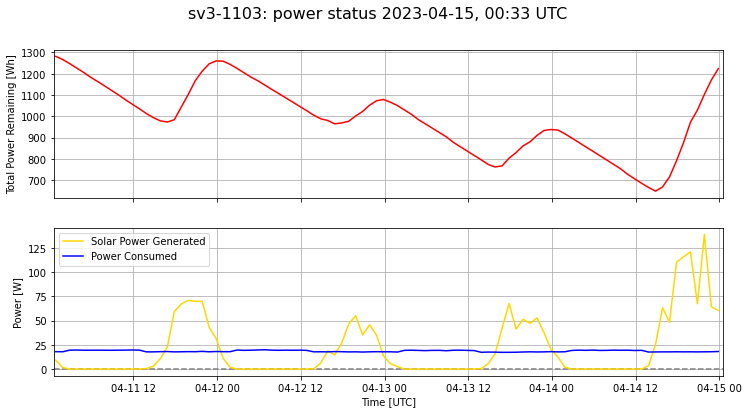

In [12]:
# Plot
labsz = 8
fntsz = 10
tL = [tst, now]
fig, ax = plt.subplots(2,1,figsize=(12, 6),sharex=True)
# totalBatteryPower
ax[0].plot(pwrDPdf['totalBatteryPower']/1000,'-r')
ax[0].set_ylabel('Total Power Remaining [Wh]', fontsize=fntsz)
# Power in/out
ax[1].plot(tL,[0,0],'--',color='gray')
l2,=ax[1].plot(pwrDPdf['solarPowerGenerated']/1000,'-',color='gold',label='Solar Power Generated')
l3,=ax[1].plot(pwrDPdf['outputPortPower']/1000,'-b',label='Power Consumed')
ax[1].legend(fontsize=fntsz)
# ax[1].legend((l1,l2,l3),('Battery Charging Power','Solar Power Generated','Power Consumed'), fontsize=fntsz)
ax[1].set_ylabel('Power [W]', fontsize=fntsz)
ax[1].set_xlabel('Time [UTC]', fontsize=fntsz)
ax[1].set_xlim(tL[0],tL[-1])

# tmstmp = date.today().strftime('%Y-%m-%d')
tmstmp = now.strftime('%Y-%m-%d, %H:%M UTC')
fig.suptitle(vnam + ': power status ' + tmstmp, fontsize=16)

# add grid lines
ax = fig.get_axes()
for axi in ax:
    axi.grid()
# fig.show()